## 2.4A
A graph or a network has *n* nodes. Its adjacency matrix *S* is *n* by *n*. This is a 0-1 matrix with *s<sub>ij</sub>* = 1 when nodes *i* and *j* are connected by an edge.  
$$S= \begin{bmatrix} 0 & 1 & 1 & 0 \\ 1 & 0 & 1 & 1 \\ 1 & 1 & 0 & 1 \\ 0 & 1 & 1 & 0 \end{bmatrix}$$ 
Can you find 5 walks of length 3 between nodes 1 and 2?

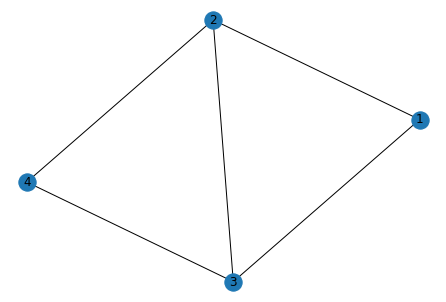

In [11]:
# import necessary libraries
import networkx as nx
import matplotlib as plt

# quick and dirty graph
G = nx.Graph()
G.add_nodes_from([1,2,3,4])
G.add_edges_from([(1, 2), (1, 3), (2, 3), (2,4), (3,4)])

nx.draw(G, with_labels=True)

The matrix *S*<sup>3</sup> will show all walks of length 3 on the graph. *S<sub>1,2</sub>* shows that there are 5 walks of length 3 between 1 and 2.
$$S^3= \begin{bmatrix} 2 & 5 & 5 & 2 \\ 5 & 4 & 5 & 5 \\ 5 & 5 & 4 & 5 \\ 2 & 5 & 5 & 2 \end{bmatrix}$$ 
The walks are:  
1->2, 2->1, 1->2  
1->2, 2->3, 3->2  
1->2, 2->4, 4->2  
1->3, 3->1, 1->2  
1->3, 3->4, 4->2  
  
 

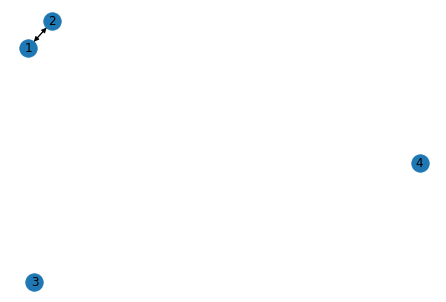

In [41]:
G1 = nx.DiGraph()
G1.add_nodes_from([1,2,3,4])
G1.add_edges_from([(1, 2), (2, 1), (1, 2)])

nx.draw(G1, with_labels=True)

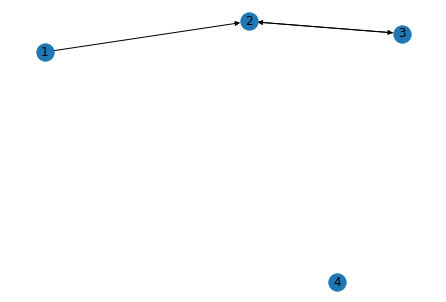

In [42]:
G2 = nx.DiGraph()
G2.add_nodes_from([1,2,3,4])
G2.add_edges_from([(1, 2), (2, 3), (3, 2)])

nx.draw(G2, with_labels=True)

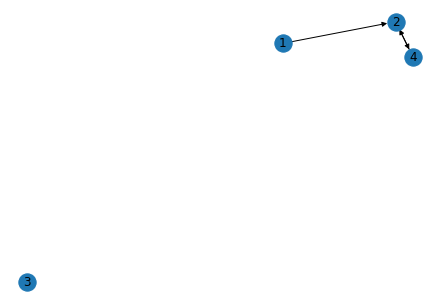

In [43]:
G3 = nx.DiGraph()
G3.add_nodes_from([1,2,3,4])
G3.add_edges_from([(1, 2), (2, 4), (4, 2)])

nx.draw(G3, with_labels=True)

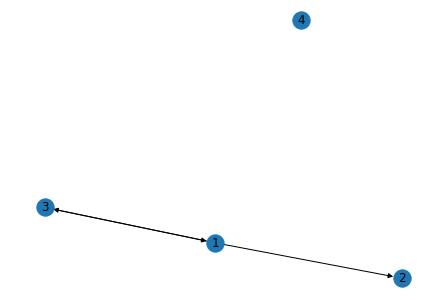

In [44]:
G4 = nx.DiGraph()
G4.add_nodes_from([1,2,3,4])
G4.add_edges_from([(1, 3), (3, 1), (1, 2)])

nx.draw(G4, with_labels=True)

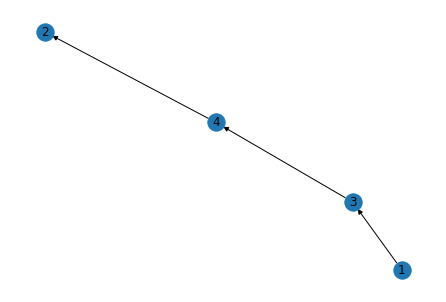

In [45]:
G5 = nx.DiGraph()
G5.add_nodes_from([1,2,3,4])
G5.add_edges_from([(1, 3), (3, 4), (4, 2)])

nx.draw(G5, with_labels=True)

## 2.4B
For these matrices, when does *AB* = *BA*? When does *BC* = *CB*? When does *A* times *BC* equal *AB* times *C*? Give the conditions on their entries *p*, *q*, *r*, *z*:  
$$A= \begin{bmatrix} p & 0 \\ q & r \\\end{bmatrix} B= \begin{bmatrix} 1 & 1 \\ 0 & 1 \\\end{bmatrix}
C= \begin{bmatrix} 0 & z \\ 0 & 0 \\\end{bmatrix}$$ 
If *p*, *q*, *r*, 1, and *z* are 4 by 4 blocks instead of numbers, do the answers change?

The first thing I did was multiply *AB* and *BA*.
$$AB= \begin{bmatrix} p & p \\ q & q+r \\\end{bmatrix} BA= \begin{bmatrix} p+q & r \\ q & r \\\end{bmatrix}$$ 
This makes it clear that in most cases *AB* != *BA*. One exception is when *p*=*q*=*r*=0 is true, which I can demonstrate below.

In [19]:
# Import necessary libraries
import numpy as np

def printArray(a, title=None):
    # Convenience function to print the array values.
    num_rows, num_cols = a.shape
    if title:
        print(title)
    for i in range(0,num_rows):
        print(a[i][:])
    print('\n')

    
p = 0
q = 0
r = 0
# Initialize A
A = np.array([[p,0],[q,r]])
A_disp = np.array([['p',0],['q','r']])
printArray(A_disp, 'A')

# Initialize B
B = np.array([[1,1],[0,1]])
printArray(B, 'B')

# Initialize AB_test
AB_test = np.array([[p,p],[q,q+r]])
AB_test_disp = np.array([['p','p'],['q','q+r']])
printArray(AB_test_disp, 'AB test')

# Initialize BA_test
BA_test = np.array([[p+q,r],[q,r]])
BA_test_disp = np.array([['p+q','r'],['q','r']])
printArray(BA_test_disp, 'BA test')

A
['p' '0']
['q' 'r']


B
[1 1]
[0 1]


AB test
['p' 'p']
['q' 'q+r']


BA test
['p+q' 'r']
['q' 'r']




Unfortunately it looks a little ugly, but I wanted to be consistent here. I made a display version of all the arrays containing strings, but the arrays used for the multiplication are referencing *p*, *q*, and *r*.

In [23]:
AB = np.matmul(A, B)
printArray(AB, 'AB')

BA = np.matmul(B, A)
printArray(BA, 'BA')

print('AB == BA:')
print(np.array_equal(AB, BA))

AB
[0 0]
[0 0]


BA
[0 0]
[0 0]


AB == BA:
True


Now let's do *BC* and *CB*.
$$BC= \begin{bmatrix} 0 & z \\ 0 & 0 \\\end{bmatrix} CB= \begin{bmatrix} 0 & z \\ 0 & 0 \\\end{bmatrix}$$
This shows that for this example *BC* is equal to *CB*. Let's test it out below.

In [26]:
z = 42

printArray(B, 'B')

# Initialize C
C = np.array([[0,z],[0,0]])
C_disp = np.array([[0,'z'],[0,0]])
printArray(C, 'C')

BC = np.matmul(B, C)
printArray(BC, 'BC')

CB = np.matmul(C, B)
printArray(CB, 'CB')

print('BC == CB:')
print(np.array_equal(BC, CB))

B
[1 1]
[0 1]


C
[ 0 42]
[0 0]


BC
[ 0 42]
[0 0]


CB
[ 0 42]
[0 0]


BC == CB:
True


*A*(*BC*) will always equal (*AB*)*C* due to the associative property.

In [27]:
A_BC = np.matmul(A, BC)
printArray(A_BC, 'A*BC')

AB_C = np.matmul(AB, C)
printArray(AB_C, 'AB*C')


print('A*BC == AB*C:')
print(np.array_equal(A_BC, AB_C))

A*BC
[0 0]
[0 0]


AB*C
[0 0]
[0 0]


A*BC == AB(*C:
True


Finally, block multiplication will not change the results because all the matrices have matching shapes